In [32]:
import datetime
import time

import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib

import numpy as np

from query_precip import *
from query_temp import *
from query_rates import *
from query_helpers import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

In [34]:
df_q = pd.read_sql(query_variables(session).statement, engine)
df_q.where(df_q['standard_name'].str.contains('rain')).dropna()

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
91,1380.0,thickness_of_rainfall_amount,Hourly rainfall,0.1 mm,time: sum,123
93,1382.0,rainfall_rate,5 minutes,0.1mm,,125
94,1383.0,rainfall_rate,10 minutes,0.1mm,,126
95,1384.0,rainfall_rate,15 minutes,0.1mm,,127
96,1385.0,rainfall_rate,30 minutes,0.1mm,,128
97,1386.0,rainfall_rate,1 hour,0.1mm,,129
98,1387.0,rainfall_rate,2 hours,0.1mm,,130
99,1388.0,rainfall_rate,6 hours,0.1mm,,131
100,1389.0,rainfall_rate,12 hours,0.1mm,,132
102,1391.0,rainfall_rate,24 hours,0.1mm,,161


In [35]:
start_time = datetime.datetime(1987, 1, 1)
end_time = datetime.datetime(1989, 1, 1)
days_in_month(start_time, end_time)
df_15_min = pd.read_sql(query_rain_rate_15(start_time, end_time, session).statement, engine)
df_all = pd.read_sql(rrall(start_time, end_time, session).statement, engine)

In [40]:
def completeness(x):
    N = x.shape[0]
    return N/(365.25*2)

df_all.groupby('station_id')['datum'].apply(completeness), df_15_min.sort_values(by="station_id")
#df_has_rain = pd.read_sql(has_rain(start_time, end_time, session).statement, engine)
#df_has_rain = df_has_rain[df_has_rain['datum']<1.0]

(station_id
 32       0.449008
 72       0.581793
 114      0.811773
 122      0.991102
 127      0.997947
 165      0.952772
 169      0.976044
 180      0.986995
 188      0.588638
 220      0.956879
 225      0.969199
 230      0.553046
 231      0.547570
 234      0.958248
 248      0.272416
 267      0.988364
 309      0.985626
 326      0.977413
 355      0.514716
 360      0.153320
 373      0.563997
 383      0.982888
 402      0.988364
 409      0.546201
 416      0.924025
 424      0.888433
 439      0.973306
 457      0.947296
 485      0.531143
 507      0.981520
            ...   
 10400    1.000684
 10408    0.852841
 10409    0.516085
 10419    1.000684
 10601    0.699521
 11034    0.810404
 11202    0.254620
 11260    0.863792
 11262    0.581793
 11392    0.203970
 11415    0.850103
 11575    0.075291
 11643    0.739220
 11670    0.965092
 11696    0.261465
 11715    0.929500
 11721    0.992471
 11727    1.000684
 11742    1.000684
 11743    0.877481
 12243    0.310746


In [26]:
df_has_rain[df_has_rain['datum']<1.0]

,datum,obs_time,lat,lon,station_id
0,0.0,1986-01-01,48.5833,-123.4170,15
2,0.0,1986-01-03,48.5833,-123.4170,15
5,0.0,1986-01-06,48.5833,-123.4170,15
11,0.0,1986-01-12,48.5833,-123.4170,15
18,0.0,1986-01-19,48.5833,-123.4170,15
22,0.0,1986-01-23,48.5833,-123.4170,15
23,0.0,1986-01-24,48.5833,-123.4170,15
24,0.0,1986-01-25,48.5833,-123.4170,15
35,0.0,1986-02-05,48.5833,-123.4170,15
36,0.0,1986-02-06,48.5833,-123.4170,15


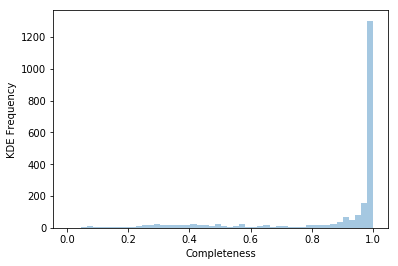

In [6]:
sns.distplot(df['anon_1'].values, kde=False)
plt.xlabel("Completeness")
plt.ylabel("KDE Frequency")
plt.savefig("plots/completeness_rainfall_rate.pdf")

In [14]:
annual_tot_precip = msc.query_annual_precip(session)
annual_tot_rain = msc.query_annual_rain(session)
query_temp = msc.query_design_temp_percentile(session)

In [15]:
query = msc.query_design_temp_percentile(session)

In [16]:
annual_tot_precip = msc.query_annual_precip(session)
#pd.read_sql(annual_tot_precip.statement, engine).head()

In [17]:
annual_tot_rain = msc.query_annual_rain(session)
#pd.read_sql(annual_tot_rain.statement, engine).head()

In [18]:
query_temp = msc.query_design_temp_percentile(session)
#pd.read_sql(query_temp.statement, engine)

In [19]:
query_design_temp_dry = msc.query_design_temp_dry(session)
#pd.read_sql(query_design_temp_dry.statement, engine).head()

In [20]:
query_design_temp_wet = msc.query_design_temp_wet(session)
#pd.read_sql(query_design_temp_wet.statement, engine)

In [21]:
hdd = msc.query_deg_day_below_18(session)
#pd.read_sql(hdd.statement, engine)

In [22]:
df_vars = pd.read_sql(msc.query_variables(session).statement, engine)
#df_vars[df_vars['net_var_name']=='127']
#df_vars[(df_vars['net_var_name'].astype(int) > 124) & (df_vars['net_var_name'].astype(int) < 132)]
df_test = df_vars[df_vars['standard_name'].str.contains('precip')]
df_test

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
72,1361,lwe_thickness_of_precipitation_amount,precipitation amount (minutes 00-60),0.1 mm,time: sum,262
73,1362,lwe_thickness_of_precipitation_amount,precipitation amount (minutes 00-15),0.1 mm,time: sum,263
74,1363,lwe_thickness_of_precipitation_amount,precipitation amount (minutes 15-30),0.1 mm,time: sum,264
75,1364,lwe_thickness_of_precipitation_amount,precipitation amount (minutes 30-45),0.1 mm,time: sum,265
76,1365,lwe_thickness_of_precipitation_amount,precipitation amount (minutes 45-60),0.1 mm,time: sum,266
108,1397,lwe_thickness_of_precipitation_amount,Total precipitation,0.1 mm,time: sum,12
119,1412,lwe_thickness_of_precipitation_amount,1200 UTC,0.1 mm,time: sum,6
120,1413,lwe_thickness_of_precipitation_amount,1800 UTC,0.1 mm,time: sum,7
121,1414,lwe_thickness_of_precipitation_amount,0000 UTC,0.1 mm,time: sum,8
122,1415,lwe_thickness_of_precipitation_amount,0600 UTC,0.1 mm,time: sum,9


In [23]:
one_day_query = msc.query_rain_rate_15(session) 
#msc.query_rain_rate_one_day_1_50(session)
df_one_day = pd.read_sql(one_day_query.statement, engine)

In [25]:
df_one_day

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness,freq
0,5.4,2004-05-28 15:00:00,2004-12-31 23:00:00,45.6084,-61.6797,8313,0.595021,
1,8.2,2004-05-27 20:00:00,2004-12-31 23:00:00,46.4600,-61.9883,8368,0.597160,
2,235.6,2004-09-03 22:00:00,2004-12-31 23:00:00,48.3694,-89.3272,5302,0.325573,
3,1.5,2004-11-14 07:00:00,2004-12-31 23:00:00,49.3998,-98.3192,4674,0.130075,
4,503.6,2004-06-16 22:00:00,2004-12-31 23:00:00,50.4333,-104.6670,3990,0.498170,
5,306.8,2004-07-27 16:00:00,2004-12-31 23:00:00,50.6306,-93.2214,5112,0.425875,
6,306.5,2004-09-13 13:00:00,2004-12-31 23:00:00,55.5333,-102.3500,4417,0.294915,
7,428.9,2004-06-30 17:00:00,2004-12-31 23:00:00,64.3167,-96.0000,2092,0.473844,
8,0.0,2004-12-20 16:00:00,2004-12-31 23:00:00,70.4833,-68.5167,2208,0.023272,
9,241.7,2004-09-18 15:00:00,2004-09-21 16:00:00,72.6933,-77.9575,2283,0.008271,


In [57]:
from gumbel import Gumbel
gum = Gumbel(10, 10)
gum.fit_transform(df=df_one_day).dropna()

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness,freq,rainfall_rate_dval
70,9.1,2006-12-11 21:00:00,2006-12-31 23:00:00,49.3372,-124.3940,239,0.055099,,10.176805
105,15.4,2007-02-14 19:00:00,2007-12-31 23:00:00,45.2333,-81.6333,5984,0.848726,,54.870283
120,2.8,2007-11-27 16:00:00,2007-12-31 23:00:00,48.8242,-123.7190,73,0.088352,,20.964908
124,11.4,2007-01-01 00:00:00,2007-12-31 23:00:00,49.3372,-124.3940,239,0.968164,,10.176805
132,6.2,2007-07-14 06:00:00,2007-12-31 23:00:00,49.8346,-124.4970,384,0.220880,,9.055597
158,64.6,2008-04-24 16:00:00,2008-12-31 23:00:00,43.7667,-81.7167,5940,0.687651,,53.157788
160,11.4,2008-07-19 01:00:00,2008-12-31 23:00:00,44.2233,-76.5994,5600,0.453339,,18.611795
166,8.8,2008-06-26 14:00:00,2008-12-31 23:00:00,44.6297,-63.5133,8280,0.515738,,12.619515
167,3.8,2008-10-21 15:00:00,2008-12-31 23:00:00,44.6353,-75.7483,5538,0.194842,,19.834366
170,7.1,2008-12-09 20:00:00,2008-12-31 23:00:00,45.2102,-67.2529,7994,0.060688,,67.894797


In [2]:
iv = 0.1

from scipy import interpolate
import lmoments3 as lm
from lmoments3 import distr
from scipy.stats import gumbel_r
#paras = distr.gam.lmom_fit(x)

def fit_gumbel(x):
    #x = x['rainfall_rate'].values
    N = x.shape[0]
    euler = 0.5772156649
    if N >= 10:
        paras = distr.gum.lmom_fit(x)
        #fitted_gum = distr.gum(**paras)
        #exval = fitted_gum.ppf(0.1)
        K_T = -(np.sqrt(6.)/np.pi)*(euler+np.log(np.log(10/9.))) 
        S = np.std(x)
        Y_bar = np.mean(x)+K_T*S
        
        lmoments = distr.gum.lmom(nmom=2, **paras)
        #lmoments = lm.lmom(x, nmom=2)
        alpha = lmoments[1]/np.log(2)
        xi = lmoments[0] - euler*alpha 
        ok = get_gumbel_design_value(xi, alpha)
        
        fitted_gum = distr.gum(**paras)
        #val = fitted_gum.ppf(0.9)
        return ok
    else:
        return np.nan
    
def get_gumbel_design_value(xi, alpha):
    gamma = (1-0.1) + np.exp(-np.exp((xi/alpha)))
    est = xi - alpha*np.log(-np.log(gamma))
    return est

def type_i_gumbel(x, mu, beta):
    A = (1./beta)*np.exp(-(x-mu)/beta)
    B = np.exp(-np.exp(-(x-mu)/beta))
    return A*B

def type_i_gumbel_cdf(x, mu, beta):
    B = np.exp(-np.exp(-(x-mu)))
    return B


dv = []
#df_rain_before = df_rain.groupby('station_id')['rainfall_rate'].apply(fit_gumbel)
#df_rain_new = df_rain_one.join(df_rain_one.groupby('station_id')['rainfall_rate'].apply(fit_gumbel), on='station_id', rsuffix='_new')

df_rain_one

NameError: name 'df_rain_one' is not defined

In [108]:
#df_rain_new = df_rain_new[df_rain_new['rainfall_rate_new'] <= 250]
df_rain_new.dropna().sort_values(by='station_id')

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness,freq,rainfall_rate_new
332,5.8,2009-01-01 00:00:00,2009-12-31 23:00:00,48.8242,-123.7190,73,0.993546,,20.964908
783,3.4,2011-01-01 00:00:00,2011-12-31 23:00:00,48.8242,-123.7190,73,0.810768,,20.964908
1051,3.6,2012-01-01 00:00:00,2012-12-31 23:00:00,48.8242,-123.7190,73,0.949227,,20.964908
1373,3.9,2013-01-01 00:00:00,2013-12-31 23:00:00,48.8242,-123.7190,73,0.998851,,20.964908
1725,6.1,2014-01-01 08:00:00,2014-12-31 22:00:00,48.8242,-123.7190,73,0.961177,,20.964908
2092,4.0,2015-01-01 01:00:00,2015-12-31 23:00:00,48.8242,-123.7190,73,0.993831,,20.964908
2475,5.6,2016-01-01 00:00:00,2016-12-31 23:00:00,48.8242,-123.7190,73,0.997282,,20.964908
2875,7.2,2017-01-01 08:00:00,2017-12-20 01:00:00,48.8242,-123.7190,73,0.965597,,20.964908
201,3.8,2008-01-01 00:00:00,2008-12-31 23:00:00,48.8242,-123.7190,73,0.997824,,20.964908
528,32.4,2010-01-01 08:00:00,2010-12-31 23:00:00,48.8242,-123.7190,73,0.728005,,20.964908


In [109]:
#alpha, xi, S, Y_bar = zip(*df_rain_new['rainfall_rate_new'].dropna().values)

In [110]:
#plt.scatter(alpha, S, marker = 'x')
#plt.xlim(0, 10)
#plt.ylim(0, 10)
#plt.title('Second Moment')
#plt.xlabel('L-moments')
#plt.ylabel('MoM')
#plt.savefig('./plots/second_moment.pdf')

In [111]:
#plt.scatter(xi, Y_bar, marker = 'x')
#plt.xlim(0, 30)
#plt.ylim(0, 30)
#plt.title('First Moment')
#plt.xlabel('L-moments')
#plt.ylabel('MoM')
#plt.savefig('./plots/first_moment.pdf')

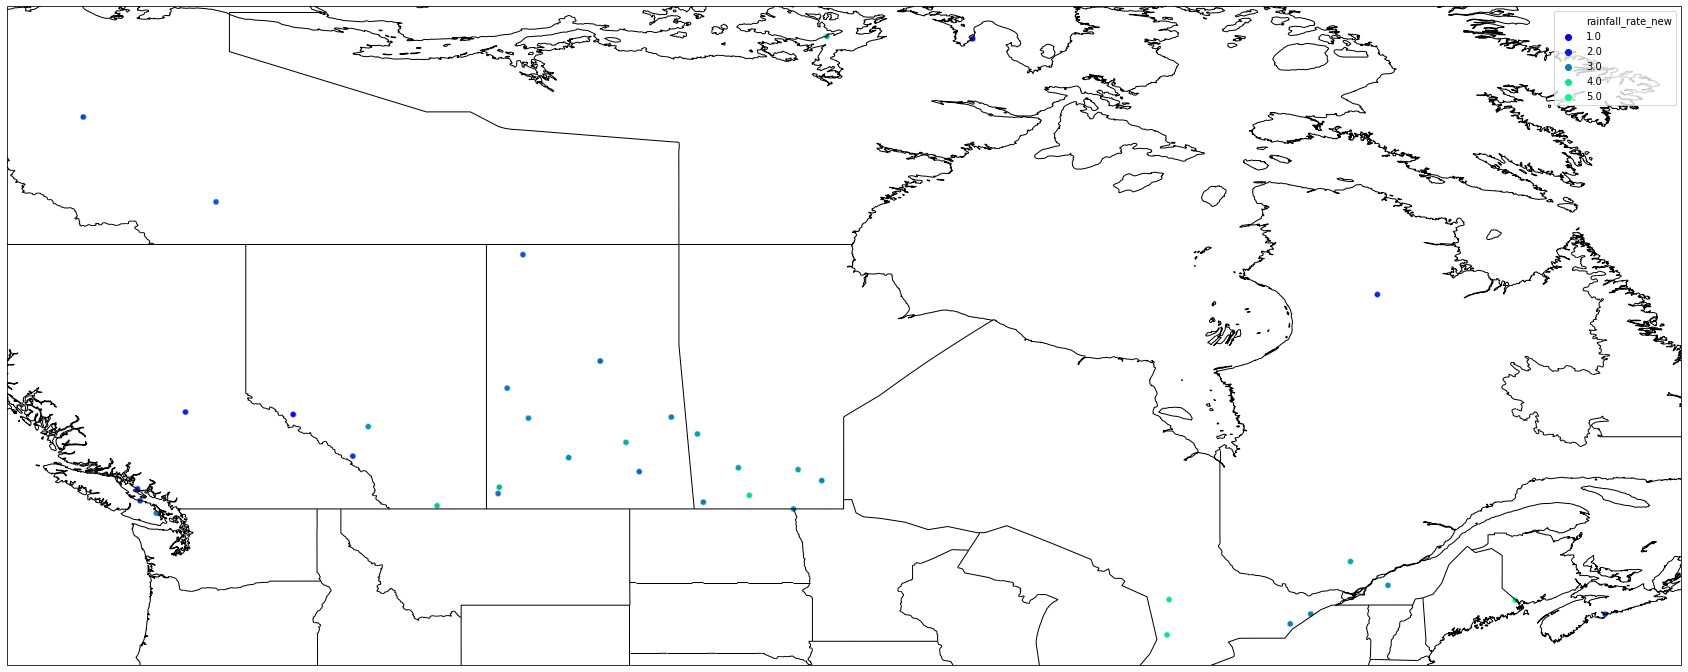

In [112]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (30, 45))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)

#sns.scatterplot(x='lon', y='lat', data=df_1, hue='dd_sum')#

#df_new = df_1[(df_1['lat'] < 61.0)&(df_1['lat'] > 45.0)&(df_1['lon'] > -138)&(df_1['lon'] < -114)]

sns.scatterplot(df_rain_new['lon'], df_rain_new['lat'], hue=np.log(df_rain_new['rainfall_rate_new']), palette="winter", alpha=.3)
#plt.ylim(40, 80)
#plt.xlim(-126, -119)
plt.savefig('./plots/canada_15_min_rain.pdf')

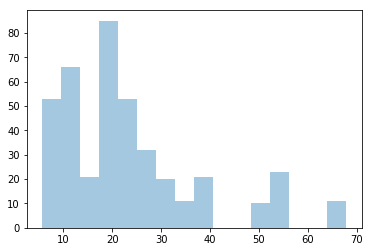

In [113]:
sns.distplot(df_rain_new['rainfall_rate_new'].dropna().values, kde=False)

In [114]:
#df_rain_rate['obs_count'].value_counts().idxmax()

In [115]:
sns.distplot(df_dv[df_dv['dv'] < 60]['dv'])#.hist(bins = 100)
plt.xlabel('15 Min Rain 10 yr return period')
plt.savefig('./plots/15_min_rain.pdf')

NameError: name 'df_dv' is not defined

In [122]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = df_rain_one[['rainfall_rate', 'lat', 'lon']]
scaler = preprocessing.StandardScaler().fit_transform(X)
labels = KMeans(n_clusters = 10, random_state=0).fit(X).labels_
X['labels'] = labels
X

/home/nannau/Desktop/map-xtreme/venv2/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rainfall_rate,lat,lon,labels
0,5.4,45.6084,-61.6797,7
1,8.2,46.4600,-61.9883,7
2,235.6,48.3694,-89.3272,1
3,1.5,49.3998,-98.3192,8
4,503.6,50.4333,-104.6670,6
5,306.8,50.6306,-93.2214,9
6,306.5,55.5333,-102.3500,9
7,428.9,64.3167,-96.0000,6
8,0.0,70.4833,-68.5167,7
9,241.7,72.6933,-77.9575,1


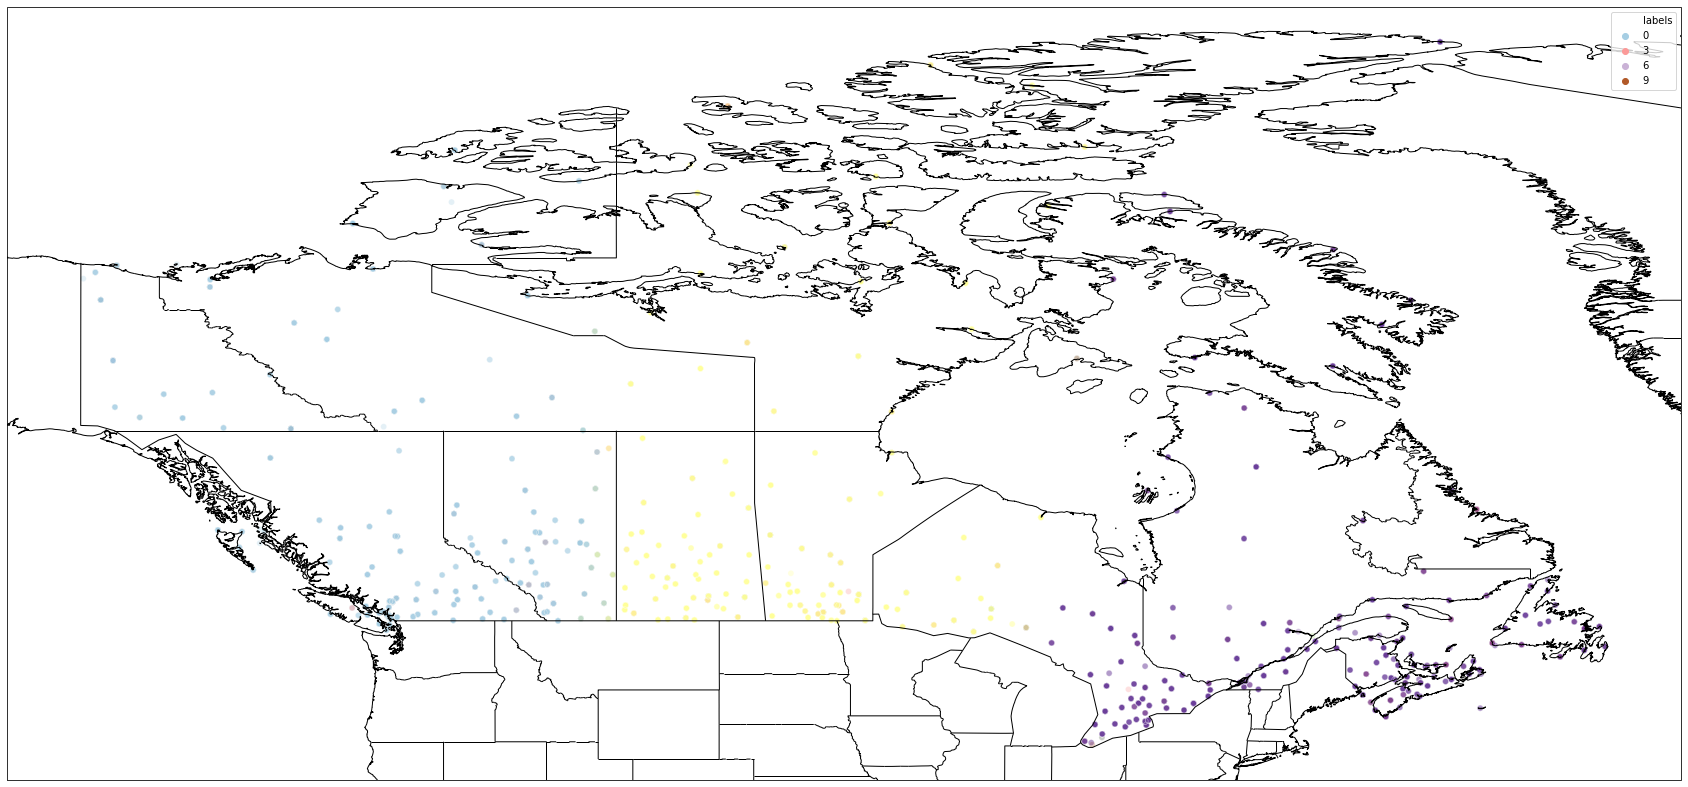

In [121]:
fig = plt.figure(figsize = (30, 45))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)

#sns.scatterplot(x='lon', y='lat', data=df_1, hue='dd_sum')#

#df_new = df_1[(df_1['lat'] < 61.0)&(df_1['lat'] > 45.0)&(df_1['lon'] > -138)&(df_1['lon'] < -114)]

sns.scatterplot(X['lon'], X['lat'], hue=X['labels'], palette="Paired", alpha=.3)
#plt.ylim(40, 80)
#plt.xlim(-126, -119)
plt.savefig('./plots/canada_15_min_rain_labelled.pdf')

ValueError: 'c' argument has 3367 elements, which is not acceptable for use with 'x' with size 3169, 'y' with size 3169.

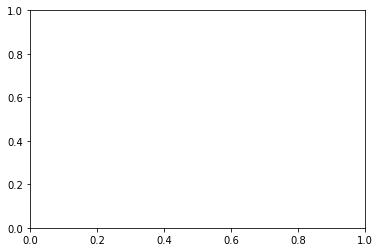

In [90]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df_rain_new['elev'], s=0.5)

In [ ]:
import sklearn.model_selection
import sklearn.datasets

import autosklearn.regression

X = df_rain_rate[['lat', 'lon', 'completeness']].values
y = df_rain_rate[['rainfall_rate']].values

def main():
    X, y = sklearn.datasets.load_boston(return_X_y=True)
    feature_types = (['numerical'] * 3) + ['categorical'] + (['numerical'] * 9)
    X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)

    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='./tmp/autosklearn_regression_example_tmp',
        output_folder='./tmp/autosklearn_regression_example_out',
    )
    automl.fit(X_train, y_train, dataset_name='boston',
               feat_type=feature_types)

    print(automl.show_models())
    predictions = automl.predict(X_test)

if __name__ == '__main__':
    main()

In [35]:
np.euler_gamma

0.5772156649015329

In [37]:

df_fit = df_one_day

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness,freq
0,5.4,2004-05-28 15:00:00,2004-12-31 23:00:00,45.6084,-61.6797,8313,0.595021,
1,8.2,2004-05-27 20:00:00,2004-12-31 23:00:00,46.4600,-61.9883,8368,0.597160,
2,235.6,2004-09-03 22:00:00,2004-12-31 23:00:00,48.3694,-89.3272,5302,0.325573,
3,1.5,2004-11-14 07:00:00,2004-12-31 23:00:00,49.3998,-98.3192,4674,0.130075,
4,503.6,2004-06-16 22:00:00,2004-12-31 23:00:00,50.4333,-104.6670,3990,0.498170,
5,306.8,2004-07-27 16:00:00,2004-12-31 23:00:00,50.6306,-93.2214,5112,0.425875,
6,306.5,2004-09-13 13:00:00,2004-12-31 23:00:00,55.5333,-102.3500,4417,0.294915,
7,428.9,2004-06-30 17:00:00,2004-12-31 23:00:00,64.3167,-96.0000,2092,0.473844,
8,0.0,2004-12-20 16:00:00,2004-12-31 23:00:00,70.4833,-68.5167,2208,0.023272,
9,241.7,2004-09-18 15:00:00,2004-09-21 16:00:00,72.6933,-77.9575,2283,0.008271,
